In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisition
import acquire

# Data Preparation
import prepare

# Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = acquire.get_telco_data()

In [3]:
df = prepare.prep_telco(df)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No,multiple_lines_Yes,online_security_No,online_security_Yes,online_backup_No,online_backup_Yes,device_protection_No,device_protection_Yes,tech_support_No,tech_support_Yes,streaming_tv_No,streaming_tv_Yes,streaming_movies_No,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,Mailed check,DSL,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,Mailed check,DSL,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic,1,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0


In [9]:
df.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

In [5]:
# Split the data into train, validate, test

train, validate, test = prepare.split_telco_data(df)

In [6]:
# Check size of each dataset

train.shape, validate.shape, test.shape

((4500, 51), (1125, 51), (1407, 51))

## Exploratory Analysis: What's driving customers to churn?

In [7]:
train.churn_Yes.value_counts()

0    3304
1    1196
Name: churn_Yes, dtype: int64

In [8]:
# Percentage of churn

churn_rate = train.churn_Yes.mean()
print('Churn Rate on Training Set: {:.2f}'
     .format(churn_rate))

Churn Rate on Training Set: 0.27


Text(0.5, 1.0, 'Churn Rate: 26.58%')

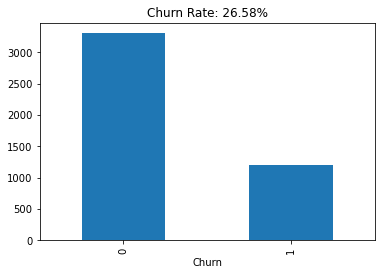

In [10]:
train.churn_Yes.value_counts().plot.bar()
plt.xlabel('Churn')
plt.title(f"Churn Rate: {churn_rate:.2%}")

***

In [ ]:
churn_rate = [0.2657777777777778,
 0.2657777777777778,
 0.23404818639131586,
 0.4315352697095436,
 0.33304647160068845,
 0.19393382352941177,
 0.3143038376149699,
 0.15219005196733482,
 0.1635969664138678,
 0.33685003767897514,
 0.24537037037037038,
 0.26794493608652903,
 0.24919391985260247,
 0.24537037037037038,
 0.2894043226146547,
 0.18571428571428572,
 0.4244421906693712,
 0.07388663967611336,
 0.17010309278350516,
 0.16283716283716285,
 0.4497991967871486,
 0.18937198067632852,
 0.42472902448815736,
 0.11655773420479303,
 0.02841429880843263,
 0.24855282199710566,
 0.2932027649769585,
 0.24464609800362977,
 0.29914040114613183]
variable = ['Female', 'Male', 'not_senior', 'is_senior', 'no_partner', 'has_partner','no_dependents','has_dependents', 'not_paperless', 'paperless', 'no_phone_service', 'has_phone_service', 'multiple_lines_No', 'multiple_lines_No_phone_service', 'multiple_line_Yes', 'DSL', 'Fiber optic', 'internet_service_none', 'bank transfer', 'credit card', 'electronic check', 'mailed check', 'month-to-month', 'one year', 'two year', 'streaming_tv_No', 'streaming_tv_Yes', 'streaming_movies_no', 'streaming_movies_Yes']

***

### Question 1. Are customers churn or not depend on their contract type?

#### Contract Type vs. Churn

<AxesSubplot:xlabel='contract_type', ylabel='count'>

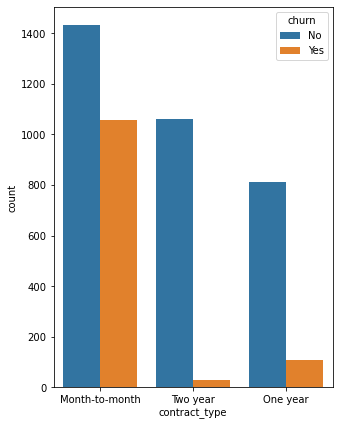

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(5,7))
sns.countplot(x="contract_type", data=train, hue="churn")

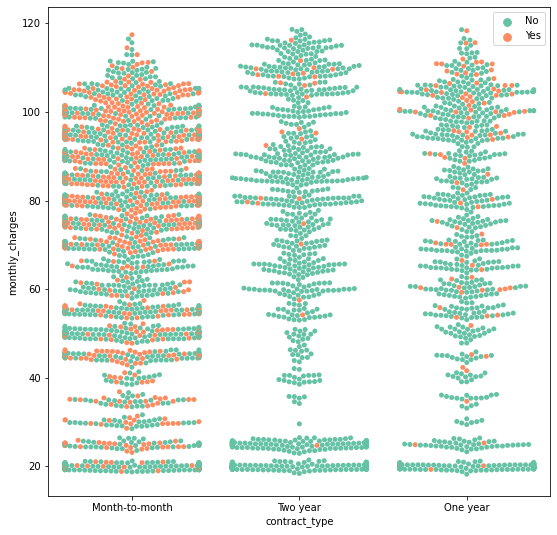

In [12]:
figure(figsize=(9,9))
sns.swarmplot(x="contract_type", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Contract type and either the customer churn or not is independent
- $H_a$ Contract type and either the customer churn or not is not independent

In [13]:
# crosstab Contract type vs. Churn

observed = pd.crosstab(train.contract_type, train.churn)
observed

churn,No,Yes
contract_type,,
Month-to-month,1433,1058
One year,811,107
Two year,1060,31


In [14]:
# Set our alpha

alpha = 0.05

In [15]:
# chi2_contingency returns 4 different values

from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [16]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[1433 1058]
 [ 811  107]
 [1060   31]]
---
Expected

[[1828  662]
 [ 674  243]
 [ 801  289]]
---

chi^2                 = 742.2653
p                     = 0.0000
degree of freedom     = 2


In [17]:
if p < alpha:
    print("We reject the hypothesis that contract type and either a customer churn or not is independent")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that contract type and either a customer churn or not is independent


### Question 2: Does customers who churn has a shorter tenure on average than those who don't?

#### Tenure vs. Monthly Charges by Churn

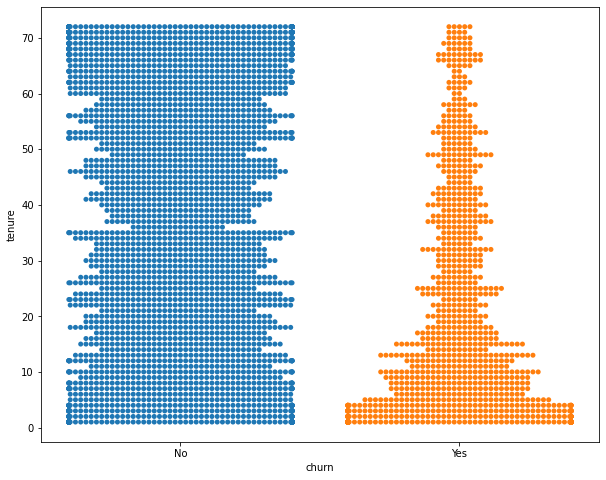

In [21]:
# Visualizing tenure distribution for customers who churn. not churn

plt.figure(figsize=(10,8))
p = sns.swarmplot(
    x="churn",
    y="tenure",
    data=train,
)

#### Statical Testing  - T Test
- $H_0$ Tenure of customers who churned >= Tenure of customers who do not churn
- $H_a$ Tenure of customers who churned < Tenure of customers who do not churn

In [22]:
churn_tenure = train[train['churn']=='Yes'].tenure

In [23]:
no_churn_tenure = train[train['churn']=='No'].tenure

In [25]:
t, p = stats.ttest_ind(churn_tenure,no_churn_tenure, equal_var=False)
t, p/2, alpha

(-27.649600939497784, 8.442633398747043e-148, 0.05)

In [26]:
if p/2 < alpha:
    print("We reject the hypothesis that tenure of customers who churned >= tenure of customers who do not churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that tenure of customers who churned >= tenure of customers who do not churn


In [118]:
# animated graph (changed in final report)

import plotly.express as px
import plotly
import matplotlib
%matplotlib inline

In [295]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No,multiple_lines_Yes,online_security_No,online_security_Yes,online_backup_No,online_backup_Yes,device_protection_No,device_protection_Yes,tech_support_No,tech_support_Yes,streaming_tv_No,streaming_tv_Yes,streaming_movies_No,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,baseline_prediction
3118,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,0.0,No,Two year,Bank transfer (automatic),DSL,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,No
2176,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,0.0,No,Two year,Mailed check,None,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,No
4054,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,0.0,No,Two year,Mailed check,DSL,0,1,1,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,No
1731,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,0.0,No,Two year,Mailed check,None,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,No
2025,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,0.0,No,One year,Mailed check,None,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,No


In [288]:
train.sort_values(by = 'tenure', ascending = True, inplace = True)

In [107]:
tenure_plot = train.sort_values('tenure', ascending = True)

In [290]:
tenure_plot = tenure_plot[tenure_plot.tenure != 0]

In [291]:
tenure_plot.churn.value_counts()

No     3302
Yes    1196
Name: churn, dtype: int64

In [286]:
tenure_plot['churn_bool'] = np.where(tenure_plot.churn == 'No', 0, 1)

In [294]:
fig = px.scatter(
    data_frame=tenure_plot, 
    x = 'churn_Yes',
    y="monthly_charges", 
    animation_frame="tenure", 
    size = 'monthly_charges',
    hover_name="monthly_charges", 
    facet_col="churn",
    size_max=45,
    range_y = [0,150]
)
fig.update_layout(
  template='plotly_dark')
fig.show()

### Question 3. Are customers with Fiber optic internet service more likely to churn?

#### Internet Service Type vs. Churn

In [31]:
train.groupby('internet_service_type').churn.value_counts()

internet_service_type  churn
DSL                    No       1246
                       Yes       290
Fiber optic            No       1164
                       Yes       825
None                   No        901
                       Yes        81
Name: churn, dtype: int64

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

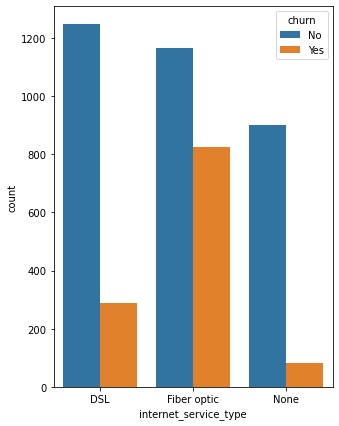

In [32]:
figure(figsize=(5,7))
sns.countplot(x="internet_service_type", data=train, hue="churn")

In [33]:
# t test
fiber_sample = train[train['internet_service_type_Fiber optic']==1].churn_Yes
no_fiber_sample = train[train['internet_service_type_Fiber optic']==0].churn_Yes

In [34]:
t, p = stats.ttest_ind(fiber_sample,no_fiber_sample, equal_var=False)
t, p/2, alpha

(20.391428960778267, 1.035757329211184e-87, 0.05)

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Customers with Fiber optic internet service is independent with their likelihood to churn
- $H_a$ Customers with Fiber optic internet service is not independent with their likelihood to churn

In [35]:
# Crosstab Internet Service Type vs Churn

observed = pd.crosstab(train['internet_service_type_Fiber optic'], train.churn_Yes)
observed

churn_Yes,0,1
internet_service_type_Fiber optic,,
0,2147,371
1,1164,825


In [88]:
# Set our alpha

alpha = 0.05

In [36]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [37]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[2147  371]
 [1164  825]]
---
Expected

[[1849  668]
 [1461  527]]
---

chi^2                 = 406.3355
p                     = 0.0000
degree of freedom     = 1


In [38]:
if p < alpha:
    print("We reject the hypothesis that Fiber optice internet service type is independent with customer's likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that Fiber optice internet service type is independent with customer's likelihood to churn


### Question 4. Do customers who churn have a higher average monthly spend than those who don't?

#### Monthly Charges by Churn

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

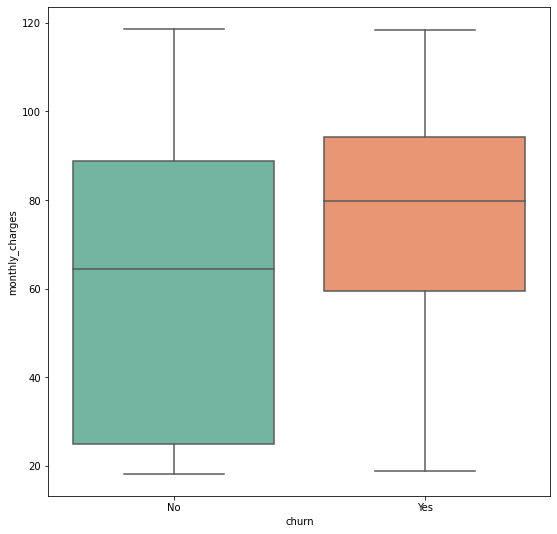

In [18]:
figure(figsize=(9,9))
sns.boxplot(x="churn", y="monthly_charges", data=train, palette="Set2")

#### Statical Testing - 1 tailed T-Test
- $H_0$ Mean of monthly charges of churned customers <= Mean of monthly charges of not churned customers
- $H_a$ Mean of monthly charges of churned customers > Mean of monthly charges of not churned customers

In [19]:
# We decide on 95% confidence level (alpha = 0.05)

alpha = 0.05

In [20]:
# Check distribution normality

train.churn.value_counts()

No     3304
Yes    1196
Name: churn, dtype: int64

In [42]:
# Calculate t and p statistic

churn_sample = train[train.churn == 'Yes'].monthly_charges
no_churn_sample = train[train.churn == 'No'].monthly_charges

In [43]:
churn_sample.var(), no_churn_sample.var()

(631.2089976560649, 974.354456388164)

In [44]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)
t, p/2, alpha

(14.069580970696023, 1.0848081790013175e-43, 0.05)

In [45]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Question 5. Is device_protection independent with churn?

In [46]:
train.device_protection.value_counts()

No                     1941
Yes                    1584
No internet service     982
Name: device_protection, dtype: int64

In [47]:
train[train.device_protection=='Yes'].churn_Yes.mean()

0.23042929292929293

In [48]:
train[train.device_protection=='No'].churn_Yes.mean()

0.38639876352395675

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Having device protection or not is independent on customers' likelihood to churn
- $H_a$ Having device protection or not is not independent on customers' likelihood to churn

In [36]:
# Crosstab Device Protection vs Churn

observed = pd.crosstab(train['device_protection'], train.churn)

In [37]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [38]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[1187  763]
 [ 915   73]
 [1202  360]]
---
Expected

[[1431  518]
 [ 725  262]
 [1146  415]]
---

chi^2                 = 353.8089
p                     = 0.0000
degree of freedom     = 2


In [39]:
if p < alpha:
    print("We reject the hypothesis that having device protection or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having device protection or not is independent with customers' likelihood to churn


### Question 6. Is online_security independent with churn?

In [41]:
train.online_security.value_counts()

No                     2212
Yes                    1300
No internet service     988
Name: online_security, dtype: int64

Text(0.5, 1.0, 'Online Security vs. Churn')

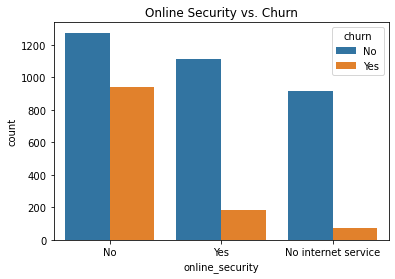

In [40]:
sns.countplot(x="online_security", data=train, hue="churn")
plt.title('Online Security vs. Churn')

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Having online security or not is independent on customers' likelihood to churn
- $H_a$ Having online security or not is not independent on customers' likelihood to churn

In [43]:
observed = pd.crosstab(train.online_security, train.churn)
observed

churn,No,Yes
online_security,,
No,1274,938
No internet service,915,73
Yes,1115,185


In [44]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [45]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[1274  938]
 [ 915   73]
 [1115  185]]
---
Expected

[[1624  587]
 [ 725  262]
 [ 954  345]]
---

chi^2                 = 571.9481
p                     = 0.0000
degree of freedom     = 2


In [46]:
if p < alpha:
    print("We reject the hypothesis that having online security or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having online security or not is independent with customers' likelihood to churn


### Question 7. Is tech_support independent with churn?

In [47]:
train.tech_support.value_counts()

No                     2209
Yes                    1303
No internet service     988
Name: tech_support, dtype: int64

Text(0.5, 1.0, 'Tech Support vs. Churn')

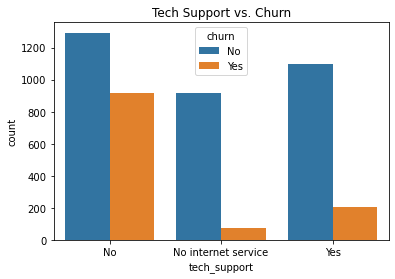

In [48]:
sns.countplot(x="tech_support", data=train, hue="churn")
plt.title('Tech Support vs. Churn')

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Having tech support or not is independent on customers' likelihood to churn
- $H_a$ Having tech support or not is not independent on customers' likelihood to churn

In [35]:
observed = pd.crosstab(train.tech_support, train.churn)
observed

churn,No,Yes
tech_support,,
No,1293,916
No internet service,915,73
Yes,1096,207


In [49]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [50]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[1274  938]
 [ 915   73]
 [1115  185]]
---
Expected

[[1624  587]
 [ 725  262]
 [ 954  345]]
---

chi^2                 = 571.9481
p                     = 0.0000
degree of freedom     = 2


In [51]:
if p < alpha:
    print("We reject the hypothesis that having tech support or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having tech support or not is independent with customers' likelihood to churn


### Question 8. Is online_backup independent with churn?

Text(0.5, 1.0, 'Online Backup vs. Churn')

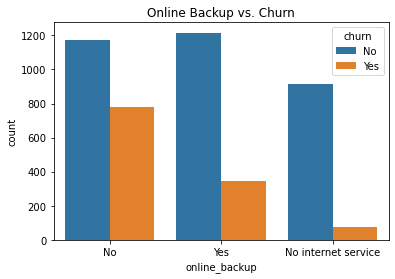

In [52]:
sns.countplot(x="online_backup", data=train, hue="churn")
plt.title('Online Backup vs. Churn')

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Having online backup or not is independent on customers' likelihood to churn
- $H_a$ Having online backup or not is not independent on customers' likelihood to churn

In [53]:
observed = pd.crosstab(train.online_backup, train.churn)
observed

churn,No,Yes
online_backup,,
No,1174,779
No internet service,915,73
Yes,1215,344


In [54]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [55]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[1174  779]
 [ 915   73]
 [1215  344]]
---
Expected

[[1433  519]
 [ 725  262]
 [1144  414]]
---

chi^2                 = 379.9891
p                     = 0.0000
degree of freedom     = 2


In [56]:
if p < alpha:
    print("We reject the hypothesis that having online backup or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having online backup or not is independent with customers' likelihood to churn


### Question 9. Is payment type independent with churn?

Text(0.5, 1.0, 'Payment Type vs. Churn')

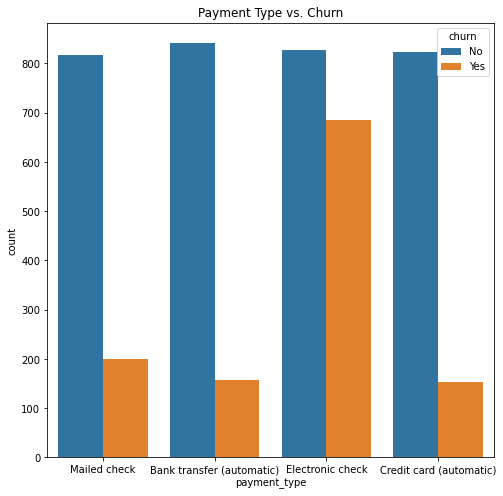

In [132]:
figure(figsize=(8,8))
sns.countplot(x="payment_type", data=train, hue="churn")
plt.title('Payment Type vs. Churn')

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Payment type is independent on customers' likelihood to churn
- $H_a$ Payment type is not independent on customers' likelihood to churn

In [133]:
observed = pd.crosstab(train.payment_type, train.churn)
observed

churn,No,Yes
payment_type,,
Bank transfer (automatic),841,158
Credit card (automatic),824,154
Electronic check,828,685
Mailed check,818,199


In [134]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [135]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[841 158]
 [824 154]
 [828 685]
 [818 199]]
---
Expected

[[ 733  265]
 [ 718  259]
 [1111  401]
 [ 747  269]]
---

chi^2                 = 415.1391
p                     = 0.0000
degree of freedom     = 3


In [136]:
if p < alpha:
    print("We reject the hypothesis that payment type is independent with customer's likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that payment type is independent with customer's likelihood to churn


### Question 9. Is streaming_tv independent with churn?

Text(0.5, 1.0, 'Streaming TV vs. Churn')

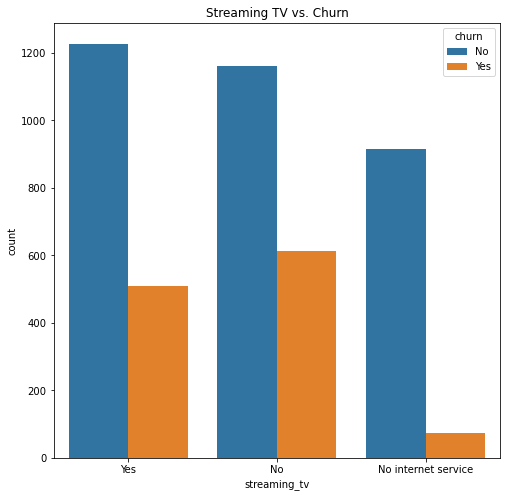

In [77]:
figure(figsize=(8,8))
sns.countplot(x="streaming_tv", data=train, hue="churn")
plt.title('Streaming TV vs. Churn')

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Streaming TV is independent on customers' likelihood to churn
- $H_a$ Streaming TV is not independent on customers' likelihood to churn

In [78]:
observed = pd.crosstab(train.streaming_tv, train.churn)
observed

churn,No,Yes
streaming_tv,,
No,1162,614
No internet service,915,73
Yes,1227,509


In [79]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the hypothesis that streaming TV is independent with customer's likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that streaming TV is independent with customer's likelihood to churn


### Summary: So, who IS most likely to churn?

- Customers who are have **Month-to-month contract**, **Fiber optic internet service type**, **Electronic check**

- Customers who dont' have **online security**, **online backup**, **device protection**, **tech support**

## Predicting Churn

### Baseline Prediction

In [57]:
train.churn.value_counts()

No     3304
Yes    1196
Name: churn, dtype: int64

In [58]:
train['baseline_prediction'] = 'No'

In [59]:
baseline_accuracy = (train.churn == train.baseline_prediction).mean()

In [60]:
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.42%


## Model 1 - Decision Tree

In [158]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No', 'multiple_lines_Yes',
       'online_security_No', 'online_security_Yes', 'online_backup_No',
       'online_backup_Yes', 'device_protection_No', 'device_protection_Yes',
       'tech_support_No', 'tech_support_Yes', 'streaming_tv_No',
       'streaming_tv_Yes', 'streaming_movies_No', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'churn_Yes', 'contract_type_Month-to-month',
       'contract_type_One year', 'contract_type_Two year',
       'payment_type_Bank transfer (automatic)',
       'payment_type

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [249]:
# split data
columns = ['monthly_charges', 'contract_type_One year',
           'contract_type_Two year', 'internet_service_type_Fiber optic',
           'internet_service_type_DSL','payment_type_Credit card (automatic)',
           'payment_type_Electronic check','payment_type_Mailed check','tenure',
           'online_security_Yes', 'online_security_No',
           'online_backup_Yes', 'online_backup_No',
           'device_protection_Yes', 'device_protection_No',
           'tech_support_Yes', 'tech_support_No',
           'streaming_tv_Yes', 'streaming_tv_No',
          'streaming_movies_Yes', 'streaming_movies_No']
X_train = train[columns]
y_train = train.churn

X_validate = validate[columns]
y_validate = validate.churn

X_test = test[columns]
y_test = test.churn

In [214]:
# Create the tree
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

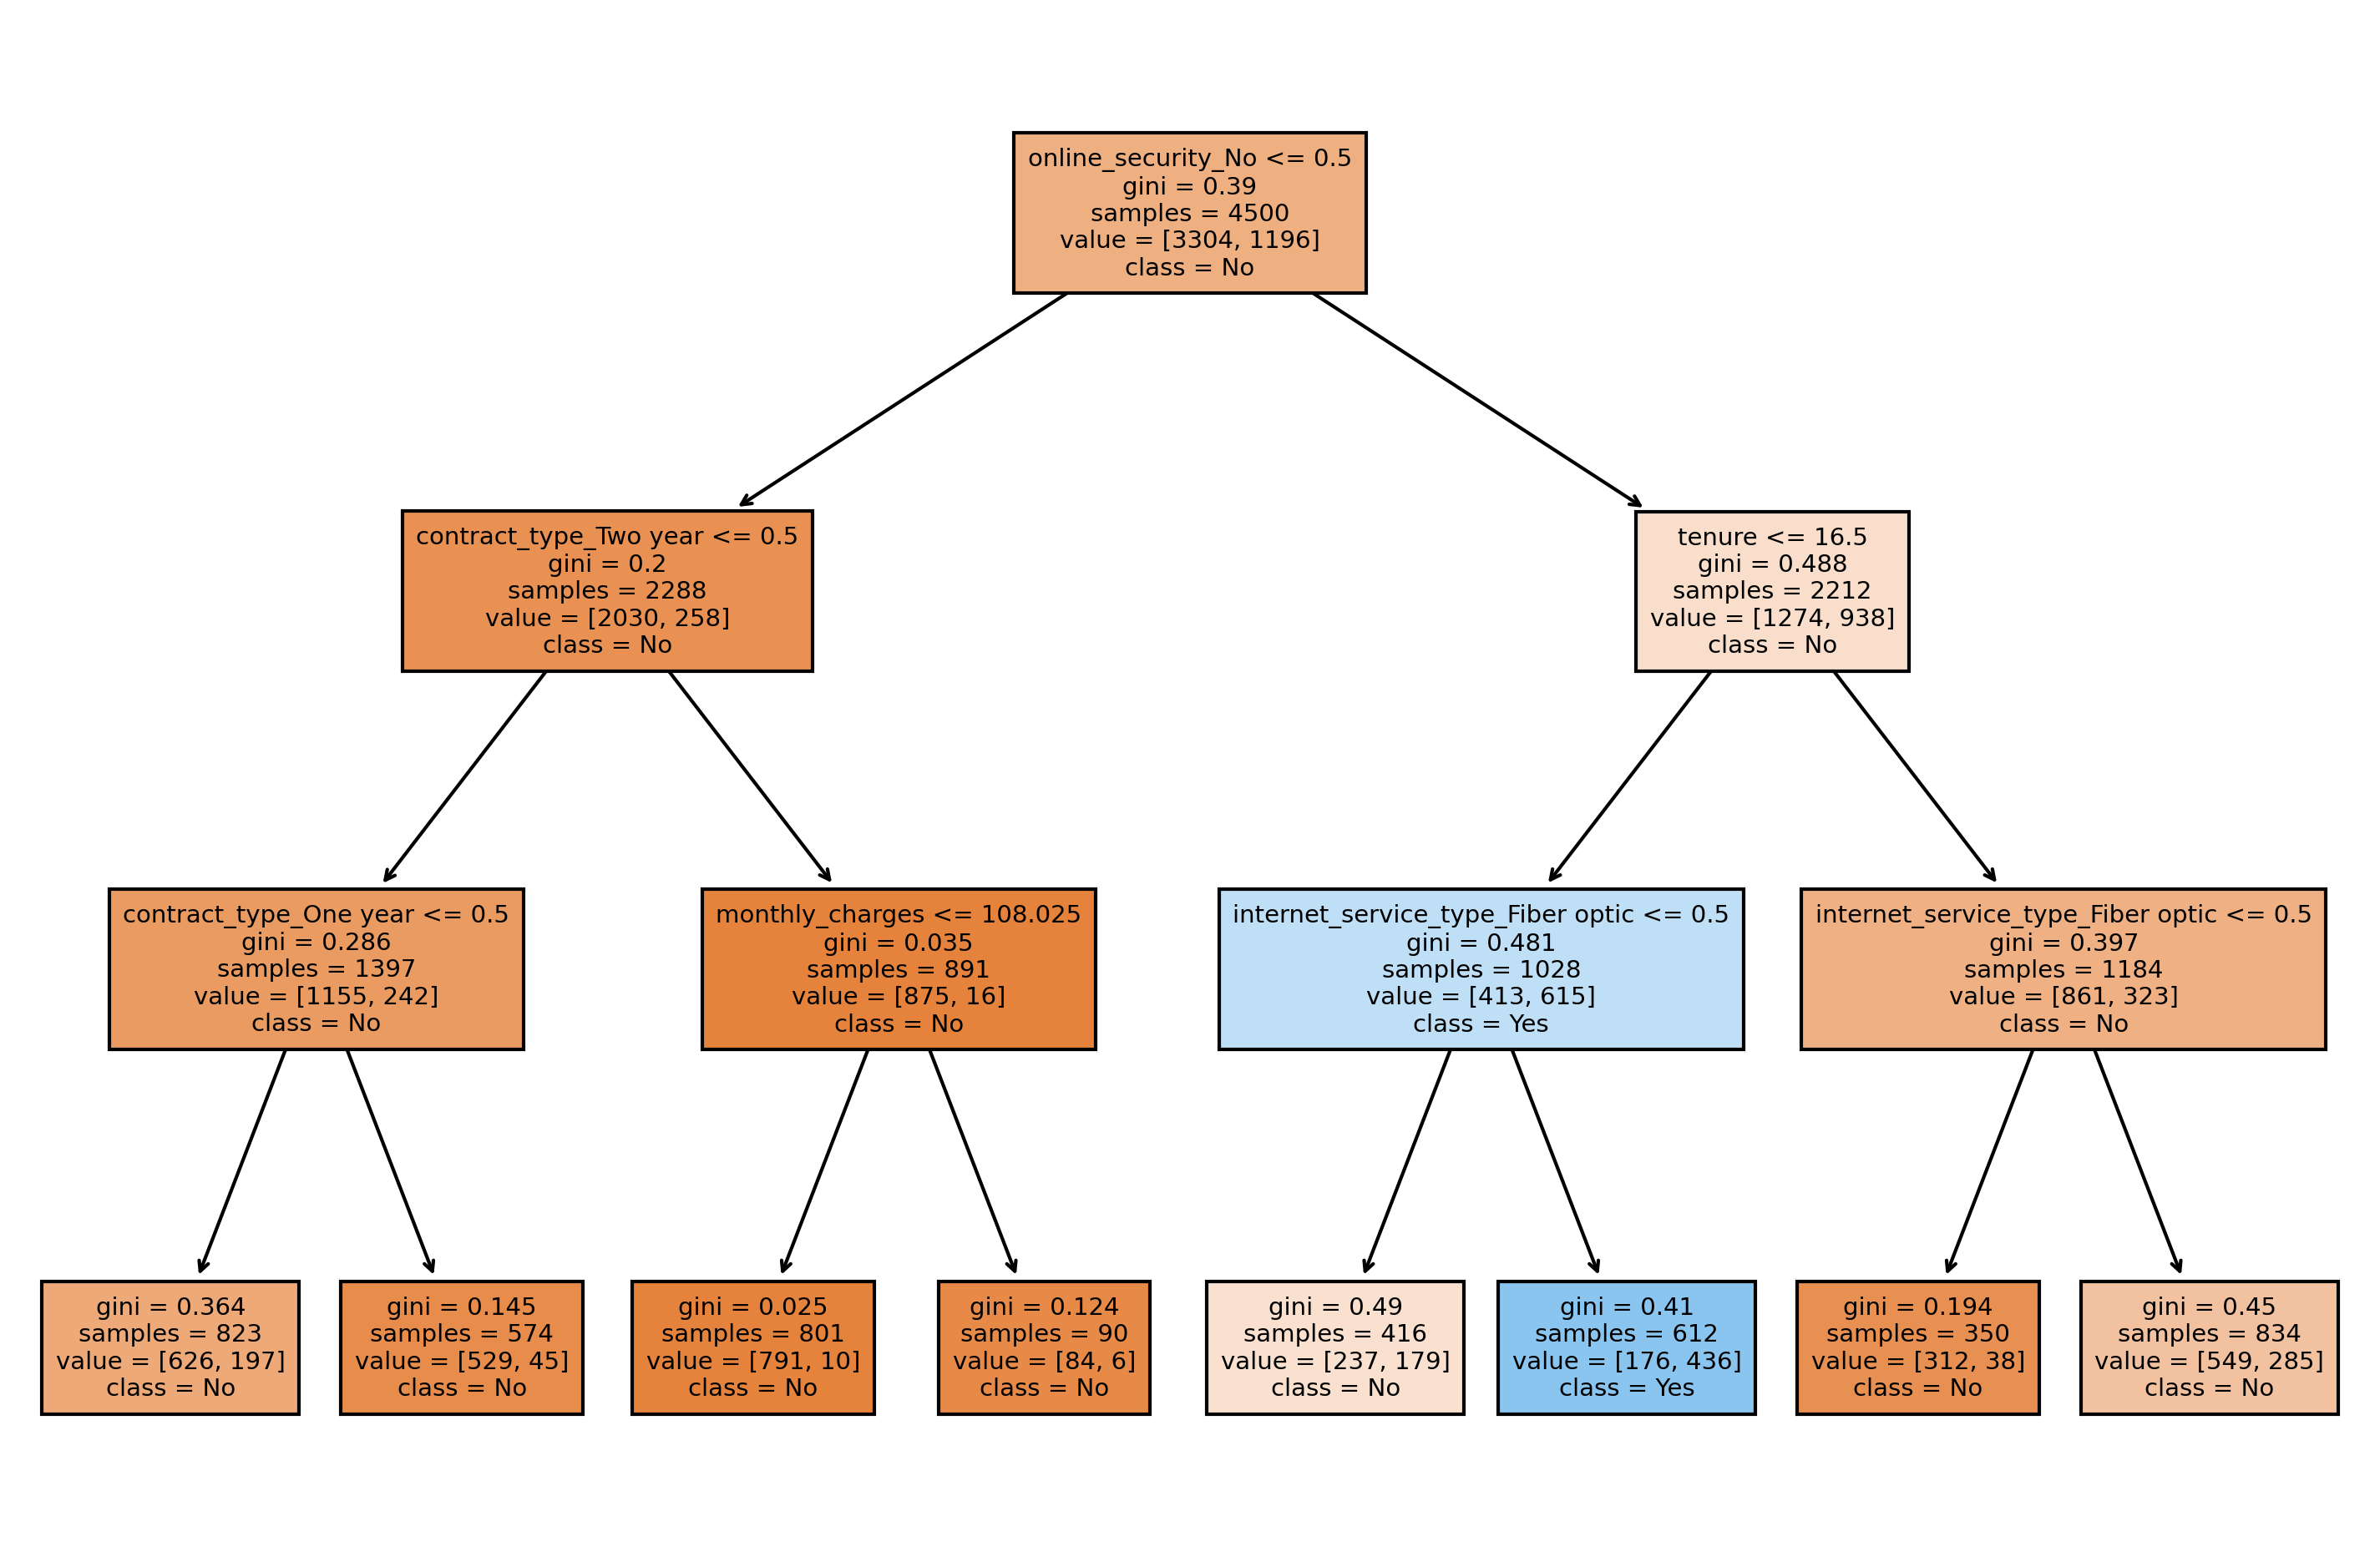

In [215]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 300)
plot_tree(tree1, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, fontsize=7)
plt.show()

In [209]:
# evaluating model

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [216]:
accuracy = pd.crosstab(y_predictions, y_train)
accuracy.reset_index()

churn,row_0,No,Yes
0,No,3128,760
1,Yes,176,436


## Model 2 - Decision Tree, exploring max depth

In [217]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

,max_depth,train_accuracy,validate_accuracy,difference
5,6,0.811778,0.782222,0.029556
6,7,0.821333,0.779556,0.041778
3,4,0.796889,0.776000,0.020889
7,8,0.834000,0.776000,0.058000
9,10,0.869333,0.773333,0.096000
2,3,0.792000,0.772444,0.019556
4,5,0.801556,0.769778,0.031778
8,9,0.850444,0.760000,0.090444
1,2,0.779111,0.758222,0.020889
11,12,0.901111,0.746667,0.154444


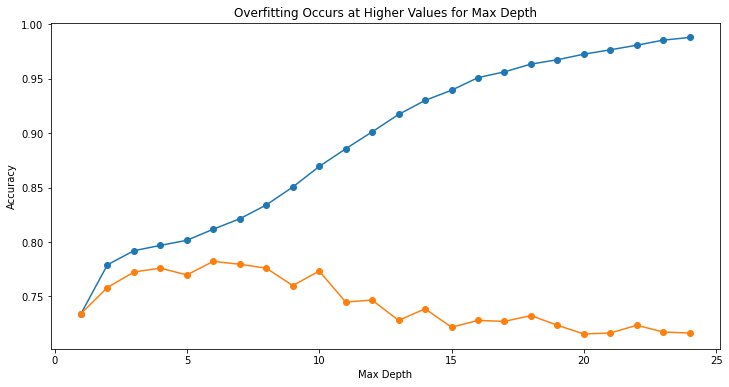

In [218]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

### max depth = 6 has the best performance

In [256]:
# Create the tree
tree6 = DecisionTreeClassifier(max_depth=6, random_state=123)

# Fit the model (on train and only train)
tree6 = tree6.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree6.predict(X_train)

In [257]:
# evaluating model

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree6.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


## Model 3 - Random Forest, max depth = 3

In [ ]:
# Using the same split for X_train, y_train

In [221]:
# Make the model
forest1 = RandomForestClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 3")
pd.DataFrame(report)

Tree of depth 3


,No,Yes,accuracy,macro avg,weighted avg
precision,0.799543,0.726297,0.790444,0.762920,0.780076
recall,0.953692,0.339465,0.790444,0.646579,0.790444
f1-score,0.869841,0.462678,0.790444,0.666260,0.761626
support,3304.000000,1196.000000,0.790444,4500.000000,4500.000000


In [222]:
# loop through max_depth, compare train vs. validate performance
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

,max_depth,train_accuracy,validate_accuracy,difference
6,8,0.826000,0.783111,0.042889
5,7,0.816889,0.782222,0.034667
3,5,0.800667,0.779556,0.021111
4,6,0.812667,0.779556,0.033111
2,4,0.796000,0.778667,0.017333
7,9,0.847333,0.776889,0.070444
8,10,0.875778,0.774222,0.101556
1,3,0.790444,0.772444,0.018000
18,20,0.992667,0.772444,0.220222
10,12,0.932889,0.771556,0.161333


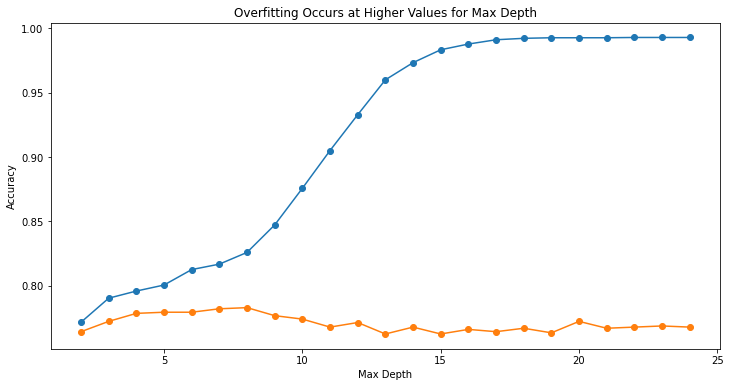

In [223]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

## Model 4 - Random Forest, max depth = 8

### max depth = 8 has the best performance

In [224]:
# Make the model
forest8 = RandomForestClassifier(max_depth=6, random_state=123)

# Fit the model (on train and only train)
forest8.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest8.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 8")
pd.DataFrame(report)

Tree of depth 8


,No,Yes,accuracy,macro avg,weighted avg
precision,0.838328,0.704519,0.812667,0.771424,0.802765
recall,0.922821,0.508361,0.812667,0.715591,0.812667
f1-score,0.878548,0.590578,0.812667,0.734563,0.802012
support,3304.000000,1196.000000,0.812667,4500.000000,4500.000000


TP = Customer churn, Predict churn

TN = Customer not churn, Predict not churn

FP = Customer not churn, Predict churn

FN = Customer churn, predict not churn

In [225]:
pd.DataFrame(confusion_matrix(y_predictions, y_train))

,0,1
0,3049,588
1,255,608


In [226]:
# We decided that 1 is positive and 0 is negative
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(608, 3049, 255, 588)

In [227]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8126666666666666
True Positive Rate: 0.5083612040133779
False Positive Rate: 0.07717917675544794
True Negative Rate: 0.9228208232445521
False Negative Rate: 0.4916387959866221
Precision: 0.7045191193511008
Recall: 0.5083612040133779
F1 Score: 0.590577950461389
Support (0): 1196
Support (1): 3304


## Model 5 - KNN, k = 1

In [228]:
# knn classifier with n_neighbour = 1

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn1.predict(X_train)

In [229]:
knn1.score(X_train, y_train)

0.9924444444444445

In [230]:
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,No,Yes
churn,,
No,3283,21
Yes,13,1183


In [231]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,No,Yes,accuracy,macro avg,weighted avg
precision,0.996056,0.982558,0.992444,0.989307,0.992468
recall,0.993644,0.989130,0.992444,0.991387,0.992444
f1-score,0.994848,0.985833,0.992444,0.990341,0.992452
support,3304.000000,1196.000000,0.992444,4500.000000,4500.000000


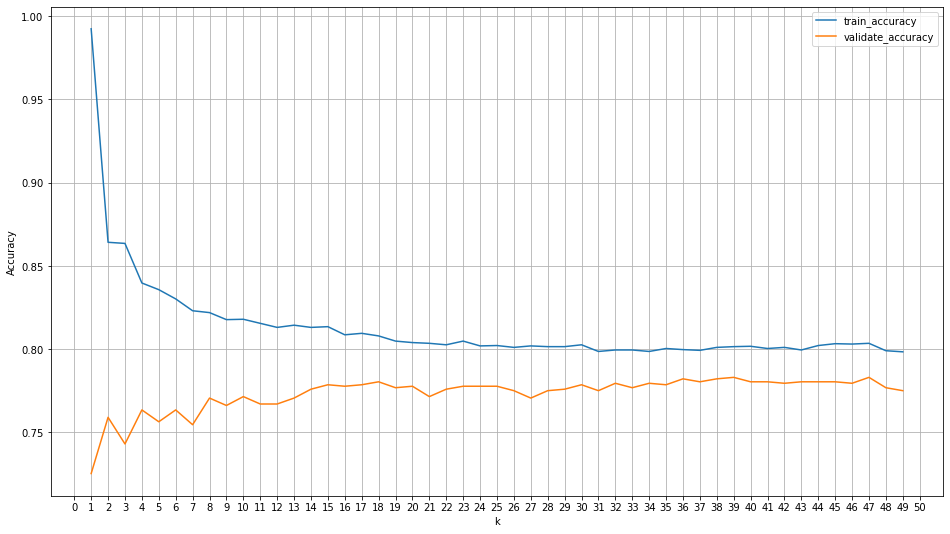

In [233]:
# finding k for best performance for train & validate

metrics = []

# loop through different values of k
for k in range(1, 50):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
results["difference"] = results.train_accuracy - results.validate_accuracy
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,51,1))
plt.grid()

In [234]:
results.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

,k,train_accuracy,validate_accuracy,difference
38,39,0.801556,0.783111,0.018444
46,47,0.803556,0.783111,0.020444
35,36,0.799778,0.782222,0.017556
37,38,0.801111,0.782222,0.018889
36,37,0.799333,0.780444,0.018889
42,43,0.799556,0.780444,0.019111
40,41,0.800444,0.780444,0.020000
39,40,0.801778,0.780444,0.021333
43,44,0.802222,0.780444,0.021778
44,45,0.803333,0.780444,0.022889


### k = 18 has the best performace

## Model 6 - KNN, k = 18

In [235]:
# knn classifier with n_neighbour = 18

knn18 = KNeighborsClassifier(32)
knn18.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn18.predict(X_train)

In [236]:
knn18.score(X_train, y_train)

0.7995555555555556

In [237]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 18")
# pd.DataFrame(report)

n_neighbour = 18


In [238]:
report

{'No': {'precision': 0.8279628618241398,
  'recall': 0.9176755447941889,
  'f1-score': 0.8705139247774907,
  'support': 3304},
 'Yes': {'precision': 0.6754176610978521,
  'recall': 0.47324414715719065,
  'f1-score': 0.5565388397246805,
  'support': 1196},
 'accuracy': 0.7995555555555556,
 'macro avg': {'precision': 0.7516902614609959,
  'recall': 0.6954598459756898,
  'f1-score': 0.7135263822510856,
  'support': 4500},
 'weighted avg': {'precision': 0.7874197373644419,
  'recall': 0.7995555555555556,
  'f1-score': 0.787066324394566,
  'support': 4500}}

In [239]:
# knn classifier with n_neighbour = 8, validate

knn18 = KNeighborsClassifier(32)
knn18.fit(X_validate, y_validate)
# get_classification_metrics(knn)
y_pred = knn18.predict(X_validate)

In [240]:
knn18.score(X_validate, y_validate)

0.776

## Model 7 - Logistic Regression, C = 1

In [250]:
logit1 = LogisticRegression(random_state = 123, C = 1)
logit1.fit(X_train, y_train)
y_pred = logit1.predict(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [251]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_validate, y_validate)))

Accuracy of Logistic Regression classifier on training set: 0.78


In [252]:
# choosing C

# create a function first for a single c
def evaluate_model(c):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    accuracy = model.score(X_validate, y_validate)
    coefs = dict(zip(X_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

# loop through different c values
models = [evaluate_model(c) for c in [.001, .01, .1, 1, 10, 100, 1000]]


(pd.DataFrame(models).round(3)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of different C values on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

,,monthly_charges,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_DSL,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure,online_security_Yes,online_security_No,online_backup_Yes,online_backup_No,device_protection_Yes,device_protection_No,tech_support_Yes,tech_support_No,streaming_tv_Yes,streaming_tv_No,streaming_movies_Yes,streaming_movies_No
C,accuracy,,,,,,,,,,,,,,,,,,,,,
0.001000,0.779000,0.031,-0.036,-0.050,0.048,-0.031,-0.017,0.075,-0.037,-0.050,-0.064,0.081,-0.021,0.038,-0.022,0.039,-0.060,0.078,-0.009,0.026,-0.001,0.018
0.010000,0.784000,0.022,-0.208,-0.314,0.208,-0.123,-0.043,0.258,-0.108,-0.041,-0.182,0.267,-0.030,0.114,-0.018,0.102,-0.147,0.231,0.022,0.062,0.056,0.028
0.100000,0.783000,0.003,-0.558,-1.018,0.627,-0.282,-0.005,0.339,-0.092,-0.033,-0.058,0.403,0.126,0.220,0.161,0.185,0.012,0.333,0.243,0.102,0.290,0.056
1.000000,0.785000,-0.006,-0.694,-1.404,0.833,-0.346,-0.012,0.368,-0.078,-0.030,0.024,0.463,0.211,0.275,0.264,0.223,0.128,0.358,0.343,0.144,0.405,0.081
10.000000,0.787000,-0.007,-0.720,-1.487,0.882,-0.367,0.029,0.367,-0.047,-0.030,0.055,0.459,0.236,0.279,0.275,0.240,0.143,0.372,0.377,0.138,0.430,0.084
100.000000,0.787000,-0.006,-0.712,-1.456,0.857,-0.360,-0.083,0.348,-0.025,-0.030,0.031,0.465,0.232,0.265,0.285,0.212,0.125,0.372,0.356,0.140,0.405,0.091
1000.000000,0.788000,-0.007,-0.723,-1.494,0.888,-0.369,0.027,0.366,-0.044,-0.030,0.057,0.462,0.239,0.281,0.278,0.241,0.144,0.376,0.380,0.139,0.431,0.088


## Model 8 - Logistic Regression, C  = 0.01

In [253]:
# Train

logit2 = LogisticRegression(random_state = 123, C = 0.01)
logit2.fit(X_train, y_train)
y_pred = logit2.predict(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.796


In [254]:
# Validate


y_pred = logit2.predict(X_validate)
print('Accuracy of Logistic Regression classifier on validate set: {:.3f}'
     .format(logit2.score(X_validate, y_validate)))

Accuracy of Logistic Regression classifier on validate set: 0.784


## Top 3 Models:
- Decision Tree, max_depth = 6
- Random Forest, max_depth = 8
- Logistic Regression, C = 0.01

### Random Forest Model

In [258]:
print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(forest8.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(forest8.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
      .format(forest8.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.813
Accuracy of Random Forest classifier on validate set: 0.780
Accuracy of Random Forest classifier on test set: 0.800


### Decision Tree Model

In [259]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree6.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree6.score(X_validate, y_validate)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
      .format(tree6.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.812
Accuracy of Decision Tree classifier on validate set: 0.782
Accuracy of Decision Tree classifier on test set: 0.798


### Logistic Regression Model

In [260]:
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
      .format(logit2.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.3f}'
      .format(logit2.score(X_validate, y_validate)))
print('Accuracy of Logistic Regression classifier on test set: {:.3f}'
      .format(logit2.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.796
Accuracy of Logistic Regression classifier on validate set: 0.784
Accuracy of Logistic Regression classifier on test set: 0.805


In [262]:
# Make predictions, export csv file

df1 = acquire.get_telco_data()
df1 = prepare.prep_telco(df1)

In [263]:
columns = ['monthly_charges', 'contract_type_One year',
           'contract_type_Two year', 'internet_service_type_Fiber optic',
           'internet_service_type_DSL','payment_type_Credit card (automatic)',
           'payment_type_Electronic check','payment_type_Mailed check','tenure',
           'online_security_Yes', 'online_security_No',
           'online_backup_Yes', 'online_backup_No',
           'device_protection_Yes', 'device_protection_No',
           'tech_support_Yes', 'tech_support_No',
           'streaming_tv_Yes', 'streaming_tv_No',
          'streaming_movies_Yes', 'streaming_movies_No']

In [265]:
telco_prediction = df1[columns]

In [266]:
probability = logit2.predict_proba(telco_prediction)
probability = pd.DataFrame(probability, columns = ['churn-no', 'churn-yes'])

In [267]:
prediction = logit2.predict(telco_prediction)
prediction = pd.DataFrame(prediction)

In [269]:
customer_id = df1['customer_id']
customer_id = pd.DataFrame(customer_id).reset_index(drop=True)
customer_id['predictions'] = logit2.predict(telco_prediction)
customer_id['churn_probability'] = probability['churn-yes']

In [270]:
customer_id.to_csv('telco_classification_churn_prediction.csv', index = False)